In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import gym, rec_gym
import numpy as np
import tensorflow as tf

from rec_gym.runner import run_experiment
import gin
from rec_gym.envs import prim_env_v1, prim_env_v2

import pickle

/home/anton/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
gin.parse_config("""
PrimEnv1.n_items = 100
PrimEnv1.n_users = 10
PrimEnv1.n_rec   = 4
PrimEnv1.embedding_dimension = 2
PrimEnv1.cluster_var = 16
PrimEnv1.in_cluster_var = 4
PrimEnv1.user_change_prob = 0.05
PrimEnv1.reward_noise = 0
PrimEnv1.user_init_sigma = 4
PrimEnv1.user_ar_coef = 1
PrimEnv1.user_drift_sigma = 0
PrimEnv1.seed = 53
PrimEnv1.user_type = 'drifting'

PrimEnv2.n_items = 1000
PrimEnv2.n_users = 10
PrimEnv2.n_rec   = 4
PrimEnv2.embedding_dimension = 2
PrimEnv2.cluster_var = 16
PrimEnv2.in_cluster_var = 4
PrimEnv2.user_change_prob = 0.05
PrimEnv2.reward_noise = 0
PrimEnv2.user_init_sigma = 4
PrimEnv2.user_ar_coef = 1
PrimEnv2.user_drift_sigma = 0
PrimEnv2.seed = 53
PrimEnv2.user_type = 'none'
PrimEnv2.new_items_interval = 1000
PrimEnv2.new_items_size = 0.
PrimEnv2.return_items_objects = False

""")

tf.reset_default_graph()
sess = tf.InteractiveSession()

def make_env():
    env = gym.make('prim-gym-v2')
    return env

In [4]:
from agents.ddpg import DDPGAgent 

Using TensorFlow backend.


In [5]:
env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim*10,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 300,
                 per = True,
                 batch_size = 64)

In [6]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

  6%|▌         | 56/1000 [00:00<00:10, 87.18it/s]/media/anton/0b9d5a44-bb63-4de1-9cfe-0da47b81e88a/TPT/3A/PRIM Vente Privee/rec_gym/agents/utils.py:275: RuntimeWarning: divide by zero encountered in double_scalars
  max_weight = (p_min * n) ** (-self.PER_b)
100%|██████████| 200/200 [01:58<00:00,  1.69it/s]


In [7]:
# with open('./logs/ddpg_no_random_init_env_finished.npy', 'wb') as f:
#     pickle.dump(file=f, obj=env)

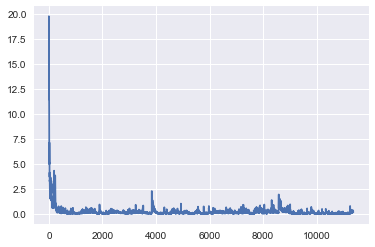

In [8]:
import matplotlib.pylab as plt
plt.plot(agent.td_losses)

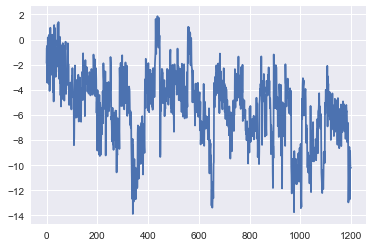

In [9]:
plt.plot(np.array(agent.qvalues).reshape(-1))

In [10]:
np.sum( [len(v) for v in env.bought_items.values() ])

295

In [11]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…

<Figure size 720x360 with 0 Axes>

In [12]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent(action_size = action_size,
                 state_dim = state_dim*10,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 300,
                 per = False,
                 batch_size = 64)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [13]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

100%|██████████| 200/200 [00:20<00:00,  9.98it/s]


In [14]:
np.sum( [len(v) for v in env.bought_items.values() ])

1647

In [15]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=10200), Output()), …

<Figure size 720x360 with 0 Axes>

In [6]:
from agents.ddpg2 import DDPGAgent2
tf.reset_default_graph()
sess = tf.InteractiveSession()
env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = DDPGAgent2(action_size = action_size,
                 state_dim = state_dim*10,
                 action_dim = action_dim,
                 gamma = .9,
                 sess = sess,
                 optimizer = tf.train.AdamOptimizer(
                     learning_rate=0.001
                 ),
                 max_tf_checkpoints_to_keep = 3,
                 experience_size = 300,
                 per = False,
                 batch_size = 64,
                 start_steps = 0)

/home/anton/anaconda3/lib/python3.6/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [7]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)


 37%|███▋      | 372/1000 [04:15<07:11,  1.46it/s]


 67%|██████▋   | 674/1000 [08:26<04:05,  1.33it/s]


 98%|█████████▊| 976/1000 [12:32<00:18,  1.30it/s]


100%|██████████| 1000/1000 [12:52<00:00,  1.30it/s]

100%|██████████| 200/200 [02:43<00:00,  1.22it/s]


In [8]:
np.sum( [len(v) for v in env.bought_items.values() ])

30

In [9]:
env.interactions

[Interaction(t=0, uid=3, recs=[0, 1, 2, 3], rewards=[1, 0, 0, 0], probs=[0.4509598972146925, 0.14754549058562896, 0.2739452779117512, 0.0026232002751795146], best_ps=[0.9364602018776842, 0.9009238015758954, 0.8412596330660908, 0.8011705191186665], ranks=[44, 271, 139, 862]),
 Interaction(t=1, uid=3, recs=[399, 226, 510, 344], rewards=[0, 0, 0, 0], probs=[0.2715549915155647, 0.0001184878752184147, 0.000903232414420955, 0.01319234735978555], best_ps=[0.9364602018776842, 0.9009238015758954, 0.8412596330660908, 0.8011705191186665], ranks=[142, 1000, 955, 677]),
 Interaction(t=2, uid=9, recs=[0, 1, 2, 3], rewards=[0, 0, 0, 0], probs=[0.004475557526911123, 0.03548438179165446, 0.006717223616236715, 0.03708150405209091], best_ps=[0.8702409704197354, 0.5034725138967556, 0.4319491887189307, 0.3530849064284352], ranks=[682, 197, 564, 188]),
 Interaction(t=3, uid=9, recs=[0, 1, 2, 3], rewards=[0, 0, 0, 0], probs=[0.004475557526911123, 0.03548438179165446, 0.006717223616236715, 0.03708150405209091

In [10]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…

<Figure size 720x360 with 0 Axes>

In [12]:
from agents.baselines import RandomAgent

env = make_env()

state_dim = env.embedding_dimension
action_dim = env.embedding_dimension
action_size = env.n_rec

agent = RandomAgent(action_size = action_size)

In [13]:
sess.run(tf.global_variables_initializer())
run_experiment(env, agent, t_train=1000, t_test=200)

100%|██████████| 200/200 [00:02<00:00, 87.04it/s]


In [14]:
np.sum( [len(v) for v in env.bought_items.values() ])

304

In [15]:
from agents.utils import data_exploring_widget
data_exploring_widget(env)

interactive(children=(IntSlider(value=0, continuous_update=False, description='Time:', max=1200), Output()), _…

<Figure size 720x360 with 0 Axes>